In [41]:
from fastai.imports import *
from fastai.basics import *

In [2]:
n = 100
x = torch.zeros(n)

In [4]:
x = x[:, None]

In [5]:
x = torch.cat([x, torch.zeros_like(x)], dim=1)

In [38]:
a = torch.rand(2, 1); a

tensor([[0.3132],
        [0.9503]])

In [104]:
a = tensor(3., 2); a

tensor([3., 2.])

In [105]:
y_true = x@a; y_true.shape

torch.Size([100])

In [106]:
y_data = x@a + torch.randn(n)*0.1; y.shape

torch.Size([100])

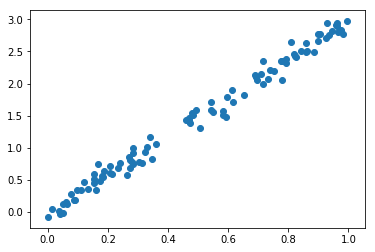

In [107]:
plt.scatter(x[:, 0], y_data)

In [78]:
def rmse(y_pred, y_true ):
    return torch.sqrt((y_true - y_pred) ** 2).mean()

rmse(y, y_true)

tensor(0.0505)

In [177]:
a = tensor(-1., 1)
y = x@a

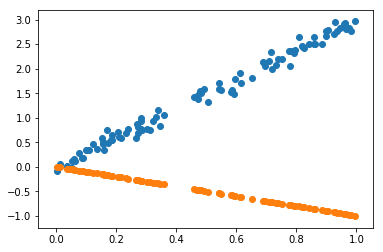

In [178]:
plt.scatter(x[:, 0], y_data)
plt.scatter(x[:, 0], y)


In [207]:
a = nn.Parameter(a)
lr = 0.01

In [208]:
def update():
    global a, lr
    y = x@a
    loss = rmse(y, y_data)
    loss.backward()
    with torch.no_grad():
        a.sub_(a.grad * lr)
        a.grad.zero_()


In [209]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:, 0], x@a)
plt.close()

def animate(i): 
    update()
    line.set_ydata(x@a)
    return line,

from matplotlib import animation, rc
rc('animation', html='jshtml')

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

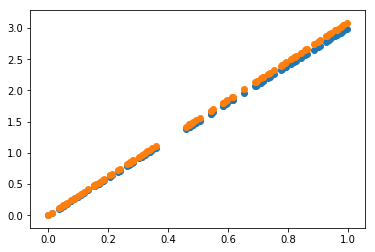

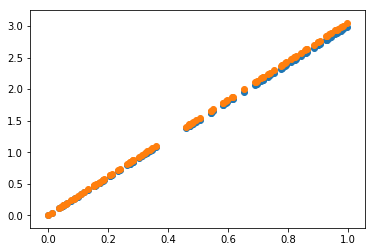

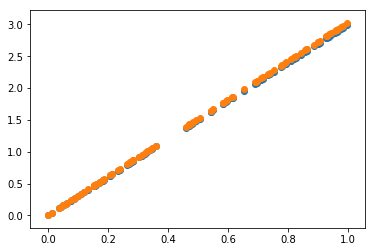

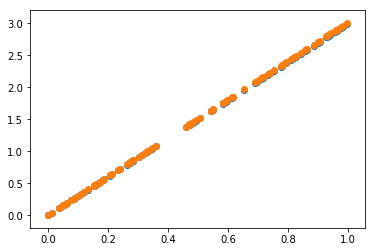

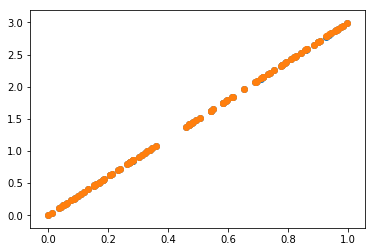

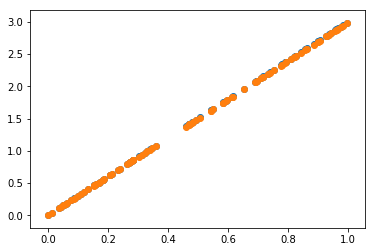

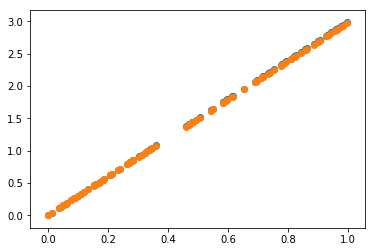

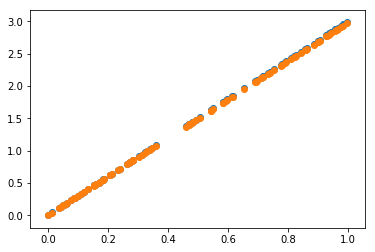

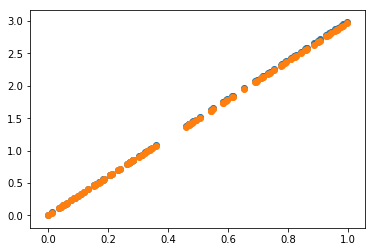

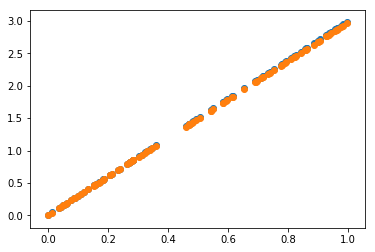

In [189]:
for i in range(10):
    plt.figure()
    update()
    y = x@a
    plt.scatter(x[:, 0], y_true)
    plt.scatter(x[:, 0], y)
    